# Lab 3 - Plots

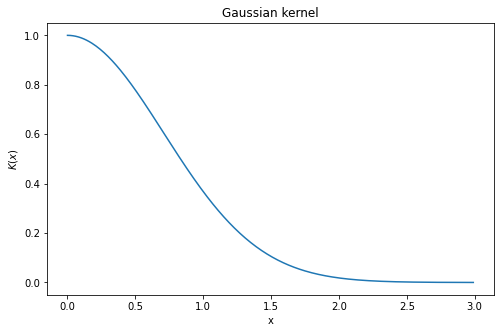

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def gauss(x):
    return np.exp(-x**2)

# x is the difference between two points regarding one feature divided by the smoothing h, changing the SD
# e.g. 100km or 10 days divided by respective h smoothing
x = np.arange(0, 3, 0.01)
y = list(map(gauss, x))

plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Gaussian kernel")
plt.xlabel("x")
plt.ylabel(r"$K(x)$")

plt.savefig("./Plots/Gauss_general", bbox_inches='tight', facecolor="white", dpi=150)

# we always see value of 0.3 around smoothing parameter

Text(0, 0.5, 'Kernel value')

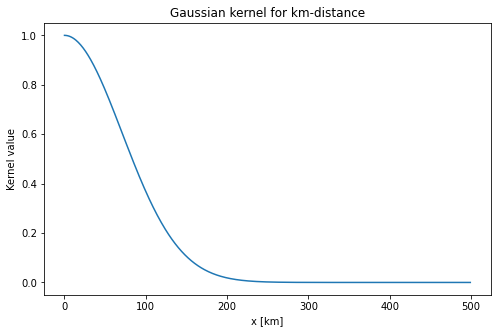

In [33]:
### km-distance
h_km = 100
x = np.arange(0, 500)
y = list(map(gauss, x/h_km))

plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Gaussian kernel for km-distance")
plt.xlabel("x [km]")
plt.ylabel(r"Kernel value")

plt.savefig("./Plots/Gauss_km", bbox_inches='tight', facecolor="white", dpi=150)

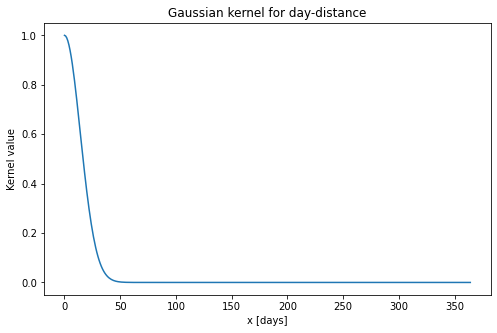

In [30]:
# day-distance
h_days = 20
x = np.arange(0, 365)
y = list(map(gauss, x/h_days))

plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Gaussian kernel for day-distance")
plt.xlabel("x [days]")
plt.ylabel(r"Kernel value")

plt.savefig("./Plots/Gauss_days", bbox_inches='tight', facecolor="white", dpi=150)

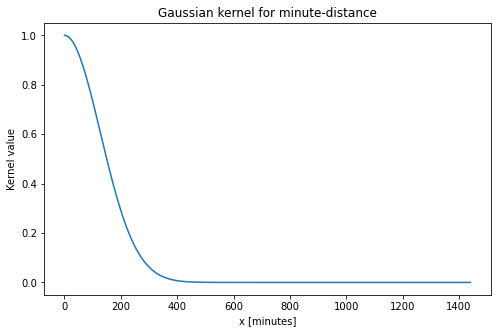

In [31]:
# hour-distance
h_minutes = 180
x = np.arange(0, 1440, 0.1)
y = list(map(gauss, x/h_minutes))

plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Gaussian kernel for minute-distance")
plt.xlabel("x [minutes]")
plt.ylabel(r"Kernel value")

plt.savefig("./Plots/Gauss_minute", bbox_inches='tight', facecolor="white", dpi=150)

In [32]:
# examples: 

# Addition:
# k(80km, 16days, 140min) ~ 1.8/sum_all

# location 1000km apart (0) + same day (1) + 1 hour (0.8) = 1.8/sum_all
# same location (1) + 100-days before (0) + 1 hour (0.8) = 1.8/sum_all

# still a high weight!


# Multiplication

# k(80km, 16days, 140min) ~ (0.6^3)/sum_all =  0.2/sum_all 

# multi(1000km, sameday, 1hour) = 0*1*0.8 = 0
# multi(0km, 100days, 1hour) = 0

# cancelling out when either one of the kernels is very distant!
# 

## Results

In [64]:
res = [('24:00:00', 7.922944304141119, 13.124808393759198),
('22:00:00', 8.295522387522821, 15.04680283007517),
('20:00:00', 8.268775329052499, 16.883093398328768),
('18:00:00', 8.139132058184966, 17.70896840165911),
('16:00:00', 9.151619938049954, 18.7728541733717),
('14:00:00', 9.090391559536018, 18.743215581223236),
('12:00:00', 8.629918952343134, 18.358435745129935),
('10:00:00', 8.456424266593087, 16.489179178473744),
('08:00:00', 7.663123175375569, 14.727321405053369),
('06:00:00', 6.901596519174886, 13.693843810711043),
('04:00:00', 7.784375541363991, 11.830753508772254)]

times = [x[0][:-3] for x in res]
temp_sum = [x[1] for x in res]
temp_mul = [x[2] for x in res]

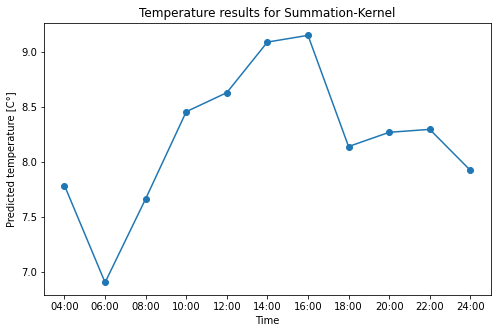

In [72]:
plt.figure(figsize=(8,5))
plt.plot(list(reversed(times)), list(reversed(temp_sum)), "-o")
plt.title("Temperature results for Summation-Kernel")
plt.xlabel("Time")
plt.ylabel("Predicted temperature [C°]")

plt.savefig("./Plots/Result_sum", bbox_inches='tight', facecolor="white", dpi=150)

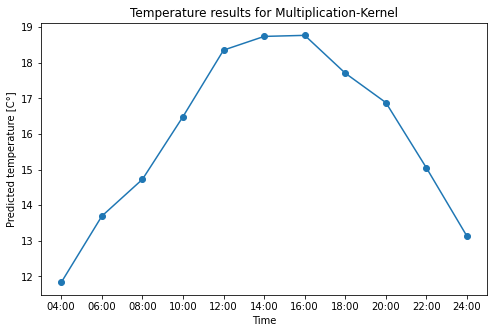

In [73]:
plt.figure(figsize=(8,5))
plt.plot(list(reversed(times)), list(reversed(temp_mul)), "-o")
plt.title("Temperature results for Multiplication-Kernel")
plt.xlabel("Time")
plt.ylabel("Predicted temperature [C°]")

plt.savefig("./Plots/Result_mult", bbox_inches='tight', facecolor="white", dpi=150)